In [1]:
!conda install -y -c conda-forge xlrd pycountry fuzzywuzzy

2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [1]:
# Import pandas library for data manipulation and analysis
import pandas as pd
import numpy as np
import cleaning as cl

import logging
import seaborn as sns
logging.getLogger().setLevel(logging.ERROR)


# Read the Excel file 'GSAF5.xls'
df = pd.read_excel('GSAF5.xls')

In [2]:
shark_attack_df = cl.clean_data(df)

In [3]:
shark_attack_df

,Type,Country,State,Activity,Sex,Age,Fatal Y/N,Month,Year,Species,Body Part
0,Provoked,United States,Massachusetts,Fishing,M,21,No,July,2025,Unknown,Leg / Foot
1,Unprovoked,United States,Florida,Surfing,M,40,No,July,2025,Great White Shark,Arm
2,Unprovoked,South Africa,KwaZulu-Natal,Fishing,M,37,Yes,July,2025,Unknown,Body / Abdomen
3,Unprovoked,Australia,New South Wales,Swimming,M,16,No,June,2025,Bull Shark,Leg / Foot
4,Unprovoked,United States,Rhode Island,Swimming,F,20,No,June,2025,Tiger Shark,Leg / Foot
...,...,...,...,...,...,...,...,...,...,...,...
7022,Unprovoked,Australia,Western Australia,Diving,M,<NA>,Yes,NaN,1903,Unknown,Unspecified / Multiple
7023,Unprovoked,Australia,Western Australia,Diving,M,<NA>,Yes,NaN,1903,Unknown,Unspecified / Multiple
7024,Unprovoked,United States,North Carolina,Swimming,M,<NA>,Yes,NaN,1900,Unknown,Unspecified / Multiple
7025,Unprovoked,Panama,NaN,Unknown,M,<NA>,Yes,NaN,1883,Unknown,Unspecified / Multiple


**1. Where the attacks happen the most**  

*Take-away*: surf and swim in these five nations and you account for ~70% of all records.

In [15]:
import plotly.express as px
import pycountry
# -----------------------------
# 1. Count
# -----------------------------
df['Country'] = df['Country'].astype(str).str.strip().str.title()
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack_Count']
# -----------------------------
# 2. TOP 10
# -----------------------------
top10 = country_counts.head(10).copy()
# -----------------------------
# 3. Convert countries names in codes ISO
# -----------------------------
def country_to_iso3(country):
    try:
        return pycountry.countries.lookup(country).alpha_3
    except:
        return None
top10['ISO3'] = top10['Country'].apply(country_to_iso3)
top10 = top10.dropna(subset=['ISO3'])
# -----------------------------
# 4. MAP
# -----------------------------
fig = px.choropleth(
    top10,
    locations='ISO3',
    color='Attack_Count',
    hover_name='Country',
    color_continuous_scale='Reds',
    title=':earth_africa: Sharks Attacks by Countries',
    projection='natural earth',
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()




**2. Top 5 dangerous activities**  


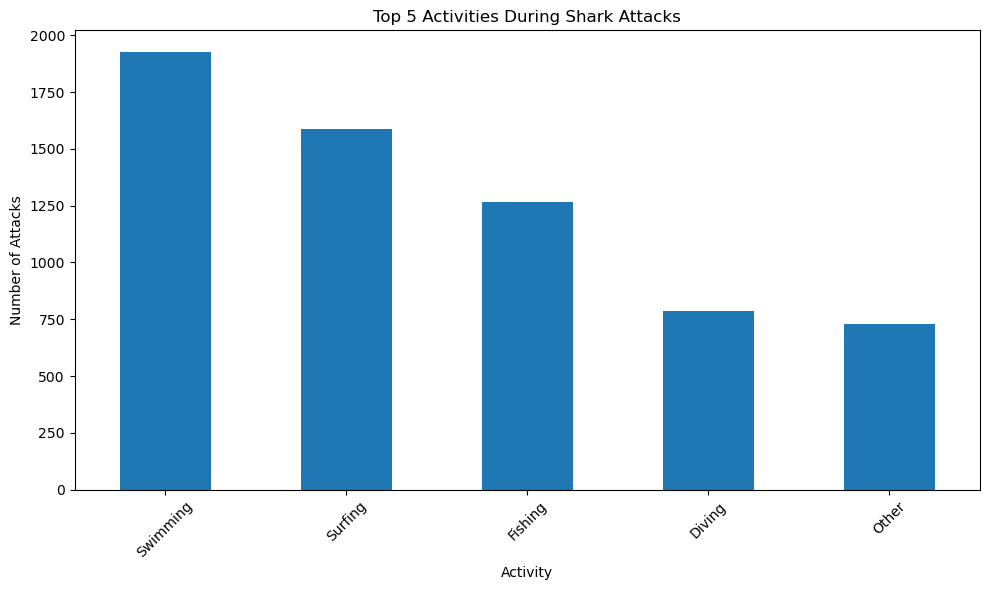

In [ ]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create bar plot of top 5 risky activitie
plt.figure(figsize=(10,6))
top_activities = shark_attack_df['Activity'].value_counts().head()
top_activities.plot(kind='bar')
plt.title('Top 5 Activities During Shark Attacks')
plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. Summer really *is* shark season**  

June–August host 38% of all attacks, peaking in **July**.  

<Axes: xlabel='Month', ylabel='count'>

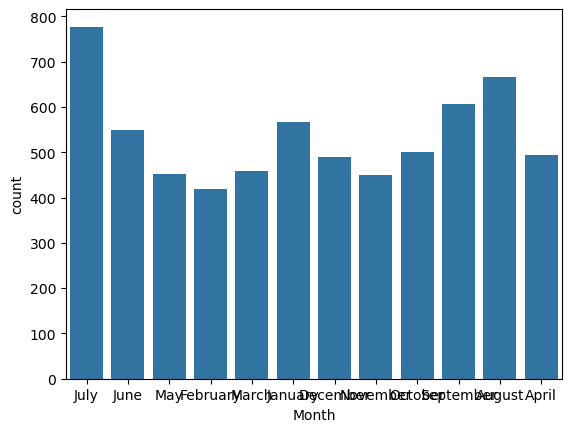

In [13]:
sns.countplot(x='Month', data=shark_attack_df)

**4. What do sharks aim for?**  

So yes, *dangling your feet* is literally offering hors d’oeuvres.

/var/folders/9x/t81_t1w14_s8w2jy_nx_xn4m0000gn/T/ipykernel_45291/2726098143.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




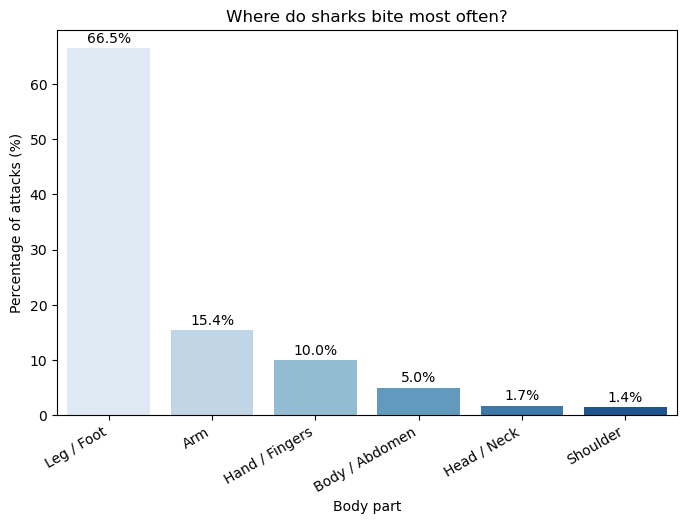

In [26]:
#3 Where do sharks bite most often?

filtered_df = shark_attack_df[shark_attack_df['Body Part'] != 'Unspecified / Multiple']

body_part_counts = filtered_df['Body Part'].value_counts(normalize=True) * 100

# Visualization

plt.figure(figsize=(8,5))
sns.barplot(x=body_part_counts.index, y=body_part_counts.values, palette='Blues')

plt.title("Where do sharks bite most often?")
plt.ylabel("Percentage of attacks (%)")
plt.xlabel("Body part")

plt.xticks(rotation=30, ha='right')

for i, val in enumerate(body_part_counts.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center')

plt.show()

**5. who are the most victimes?**  
-  Sex: 82% male, 17% female, 1% unknown  
-  Median age: 24 years  

median age: 24 years


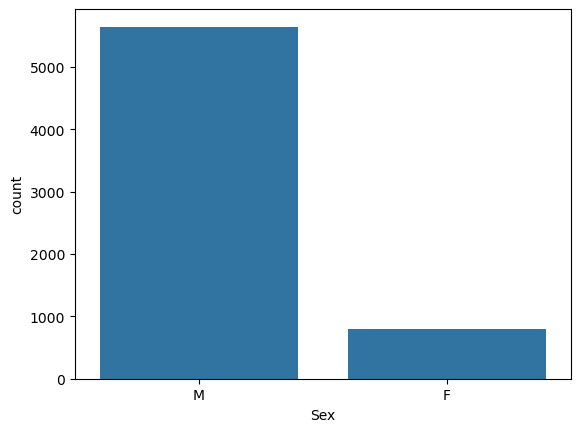

In [62]:

sns.countplot(x='Sex', data=shark_attack_df)
print(f'median age: {int(shark_attack_df['Age'].median())} years')


**6. Top 5 dangerous sharks**  

In [63]:
shark_attack_df[shark_attack_df['Species'] != 'Unknown']['Species'].value_counts().head(5)

Species
Great White Shark         1301
Tiger Shark                525
Bull Shark                 466
Oceanic Whitetip Shark     133
Nurse Shark                111
Name: count, dtype: int64

In [23]:
counts = shark_attack_df[shark_attack_df['Species'] != 'Unknown']['Species'].value_counts().head(5).reset_index()
counts.columns = ['Species', 'Count']
fig = px.pie(
    counts,
    names='Species',
    values='Count',
    
    title="Top 5 dangerous sharks (percentage of attacks)"
)
fig.show()

**7. Fatality trends**  

In [24]:
counts = shark_attack_df['Fatal Y/N'].value_counts().reset_index()
counts.columns = ['Fatal', 'Count']
fig = px.pie(
    counts,
    names='Fatal',
    values='Count',
    color='Fatal',
    color_discrete_map={'Y': 'red', 'N': 'blue'},
    
    title="Distribution of Fatal vs Non-fatal attacks"
)
fig.show()

**8. State-side hot-spots**  
| US State | Incidents |
|----------|-----------|
| Florida | 867 |
| California | 128 |
| Hawaii | 121 |
| South Carolina | 85 |
| North Carolina | 79 |

Florida alone logs **63% of U.S. events** – cue the “Sunshine & Sharks” slogan.

In [19]:
# Group attacks by state
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Attack_Count']
# Uses official state abbreviations for Plotly (ex: FL, CA, TX)
# -------------------------------
# Dictionary complete names
# -------------------------------
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
# Add a column with abbreviations
state_counts['Code'] = state_counts['State'].map(us_state_abbrev)
# Delete rows where the state is not recognized
state_counts = state_counts.dropna(subset=['Code'])
# -------------------------------
# Map
# -------------------------------
fig = px.choropleth(
    state_counts,
    locations='Code',  # abbreviations
    locationmode='USA-states',
    color='Attack_Count',
    scope='usa',
    color_continuous_scale='reds',
    title='Sharks attacks in USA'
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()

**9. Does the Anti-Shark Sunscreen Work ?**

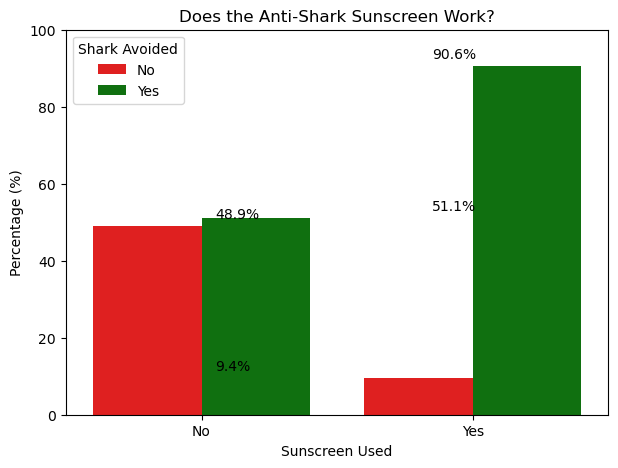

In [25]:
#6 Does the Anti-Shark Sunscreen Work ?

np.random.seed(42)

# Number of participants
n = 100

# Generate sunscreen usage (50% use sunscreen)
sunscreen_used = np.random.choice(['Yes', 'No'], size=n, p=[0.5, 0.5])

# Generate outcome based on sunscreen usage
shark_avoided = []
for used in sunscreen_used:
    if used == 'Yes':
        # 90% positive outcome if sunscreen used
        shark_avoided.append(np.random.choice(['Yes', 'No'], p=[0.9, 0.1]))
    else:
        # Only 50% positive outcome without sunscreen
        shark_avoided.append(np.random.choice(['Yes', 'No'], p=[0.5, 0.5]))

# Create DataFrame
df_sunscreen_test = pd.DataFrame({
    'Person_ID': range(1, n + 1),
    'Sunscreen_Used': sunscreen_used,
    'Shark_Avoided': shark_avoided
})


# Create a grouped DataFrame for counts
data_counts = df_sunscreen_test.groupby(['Sunscreen_Used', 'Shark_Avoided']).size().reset_index(name='Count')

# Calculate percentages
total_counts = data_counts.groupby('Sunscreen_Used')['Count'].transform('sum')
data_counts['Percentage'] = (data_counts['Count'] / total_counts) * 100

plt.figure(figsize=(7,5))
sns.barplot(data=data_counts, 
            x='Sunscreen_Used', 
            y='Percentage', 
            hue='Shark_Avoided', 
            palette={'Yes':'green','No':'red'})

plt.title('Does the Anti-Shark Sunscreen Work?')
plt.ylabel('Percentage (%)')
plt.xlabel('Sunscreen Used')
plt.ylim(0, 100)

# Add percentage labels
for i, row in data_counts.iterrows():
    plt.text(row.name % 2 + (-0.15 if row['Shark_Avoided'] == 'Yes' else 0.05),
             row['Percentage'] + 2,
             f"{row['Percentage']:.1f}%", 
             color='black')

plt.legend(title='Shark Avoided')
plt.show()